Import and clean the data

In [76]:
#import packages
!pip3 install pandas --user --upgrade --quiet
!pip3 install numpy --user --upgrade --quiet
!pip3 install scipy --user --upgrade --quiet
!pip3 install statsmodels --user --upgrade --quiet
!pip3 install seaborn --user --upgrade --quiet
!pip3 install scikit-learn --user --upgrade --quiet


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('float_format', '{:.3f}'.format)
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import zscore, iqr, median_abs_deviation

In [78]:
#Check version
pd.__version__

'2.0.1'

## Import file and explore data

In [79]:
#import data from
df = pd.read_csv('exoplanets.csv', sep=',', header=0, index_col=0)
# Print the shape of the dataset
print(df.shape)
# Print the first 100 rows of the dataset
df.head(100)

(9564, 48)


,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.737,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.526,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734868,K00805.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.053,0,1,0,0,10.328,...,-169.000,4.359,0.180,-0.180,1.024,0.280,-0.186,287.697,38.886,15.646
3832474,K00806.01,Kepler-30 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,143.206,...,-120.000,4.556,0.014,-0.081,0.867,0.079,-0.037,285.284,38.947,15.403
8395660,K00116.03,Kepler-106 b,CONFIRMED,CANDIDATE,0.950,0,0,0,0,6.165,...,-117.000,4.406,0.090,-0.110,1.012,0.154,-0.103,300.864,44.338,12.882


In [80]:
print(df.columns)

Index(['kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition',
       'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [81]:
#Rename df columns
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df.head()

,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418,...,-81.000,4.467,0.064,-0.096,0.927,0.105,-0.061,291.934,48.142,15.347
10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899,...,-176.000,4.544,0.044,-0.176,0.868,0.233,-0.078,297.005,48.134,15.436
10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.737,...,-174.000,4.564,0.053,-0.168,0.791,0.201,-0.067,285.535,48.285,15.597
10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.526,...,-211.000,4.438,0.070,-0.210,1.046,0.334,-0.133,288.755,48.226,15.509


### Data exploration

In [82]:
# Print the data types of the dataset
df.dtypes

KOIName                                                   object
KeplerName                                                object
ExoplanetArchiveDisposition                               object
DispositionUsingKeplerData                                object
DispositionScore                                         float64
NotTransit-LikeFalsePositiveFlag                           int64
koi_fpflag_ss                                              int64
CentroidOffsetFalsePositiveFlag                            int64
EphemerisMatchIndicatesContaminationFalsePositiveFlag      int64
OrbitalPeriod_days                                       float64
OrbitalPeriodUpperUnc_days                               float64
OrbitalPeriodLowerUnc_days                               float64
TransitEpoch_BKJD                                        float64
TransitEpochUpperUnc_BKJD                                float64
TransitEpochLowerUnc_BKJD                                float64
ImpactParamete           

In [83]:
# Analysing type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, 10797460 to 10156110
Data columns (total 48 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KOIName                                                9564 non-null   object 
 1   KeplerName                                             2359 non-null   object 
 2   ExoplanetArchiveDisposition                            9564 non-null   object 
 3   DispositionUsingKeplerData                             9564 non-null   object 
 4   DispositionScore                                       8054 non-null   float64
 5   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 6   koi_fpflag_ss                                          9564 non-null   int64  
 7   CentroidOffsetFalsePositiveFlag                        9564 non-null   int64  
 8   EphemerisMatchIndicatesContaminationFalseP

(array([[<Axes: title={'center': 'DispositionScore'}>,
         <Axes: title={'center': 'NotTransit-LikeFalsePositiveFlag'}>,
         <Axes: title={'center': 'koi_fpflag_ss'}>,
         <Axes: title={'center': 'CentroidOffsetFalsePositiveFlag'}>,
         <Axes: title={'center': 'EphemerisMatchIndicatesContaminationFalsePositiveFlag'}>,
         <Axes: title={'center': 'OrbitalPeriod_days'}>,
         <Axes: title={'center': 'OrbitalPeriodUpperUnc_days'}>],
        [<Axes: title={'center': 'OrbitalPeriodLowerUnc_days'}>,
         <Axes: title={'center': 'TransitEpoch_BKJD'}>,
         <Axes: title={'center': 'TransitEpochUpperUnc_BKJD'}>,
         <Axes: title={'center': 'TransitEpochLowerUnc_BKJD'}>,
         <Axes: title={'center': 'ImpactParamete'}>,
         <Axes: title={'center': 'ImpactParameterUpperUnc'}>,
         <Axes: title={'center': 'ImpactParameterLowerUnc'}>],
        [<Axes: title={'center': 'TransitDuration_hrs'}>,
         <Axes: title={'center': 'TransitDurationUpp

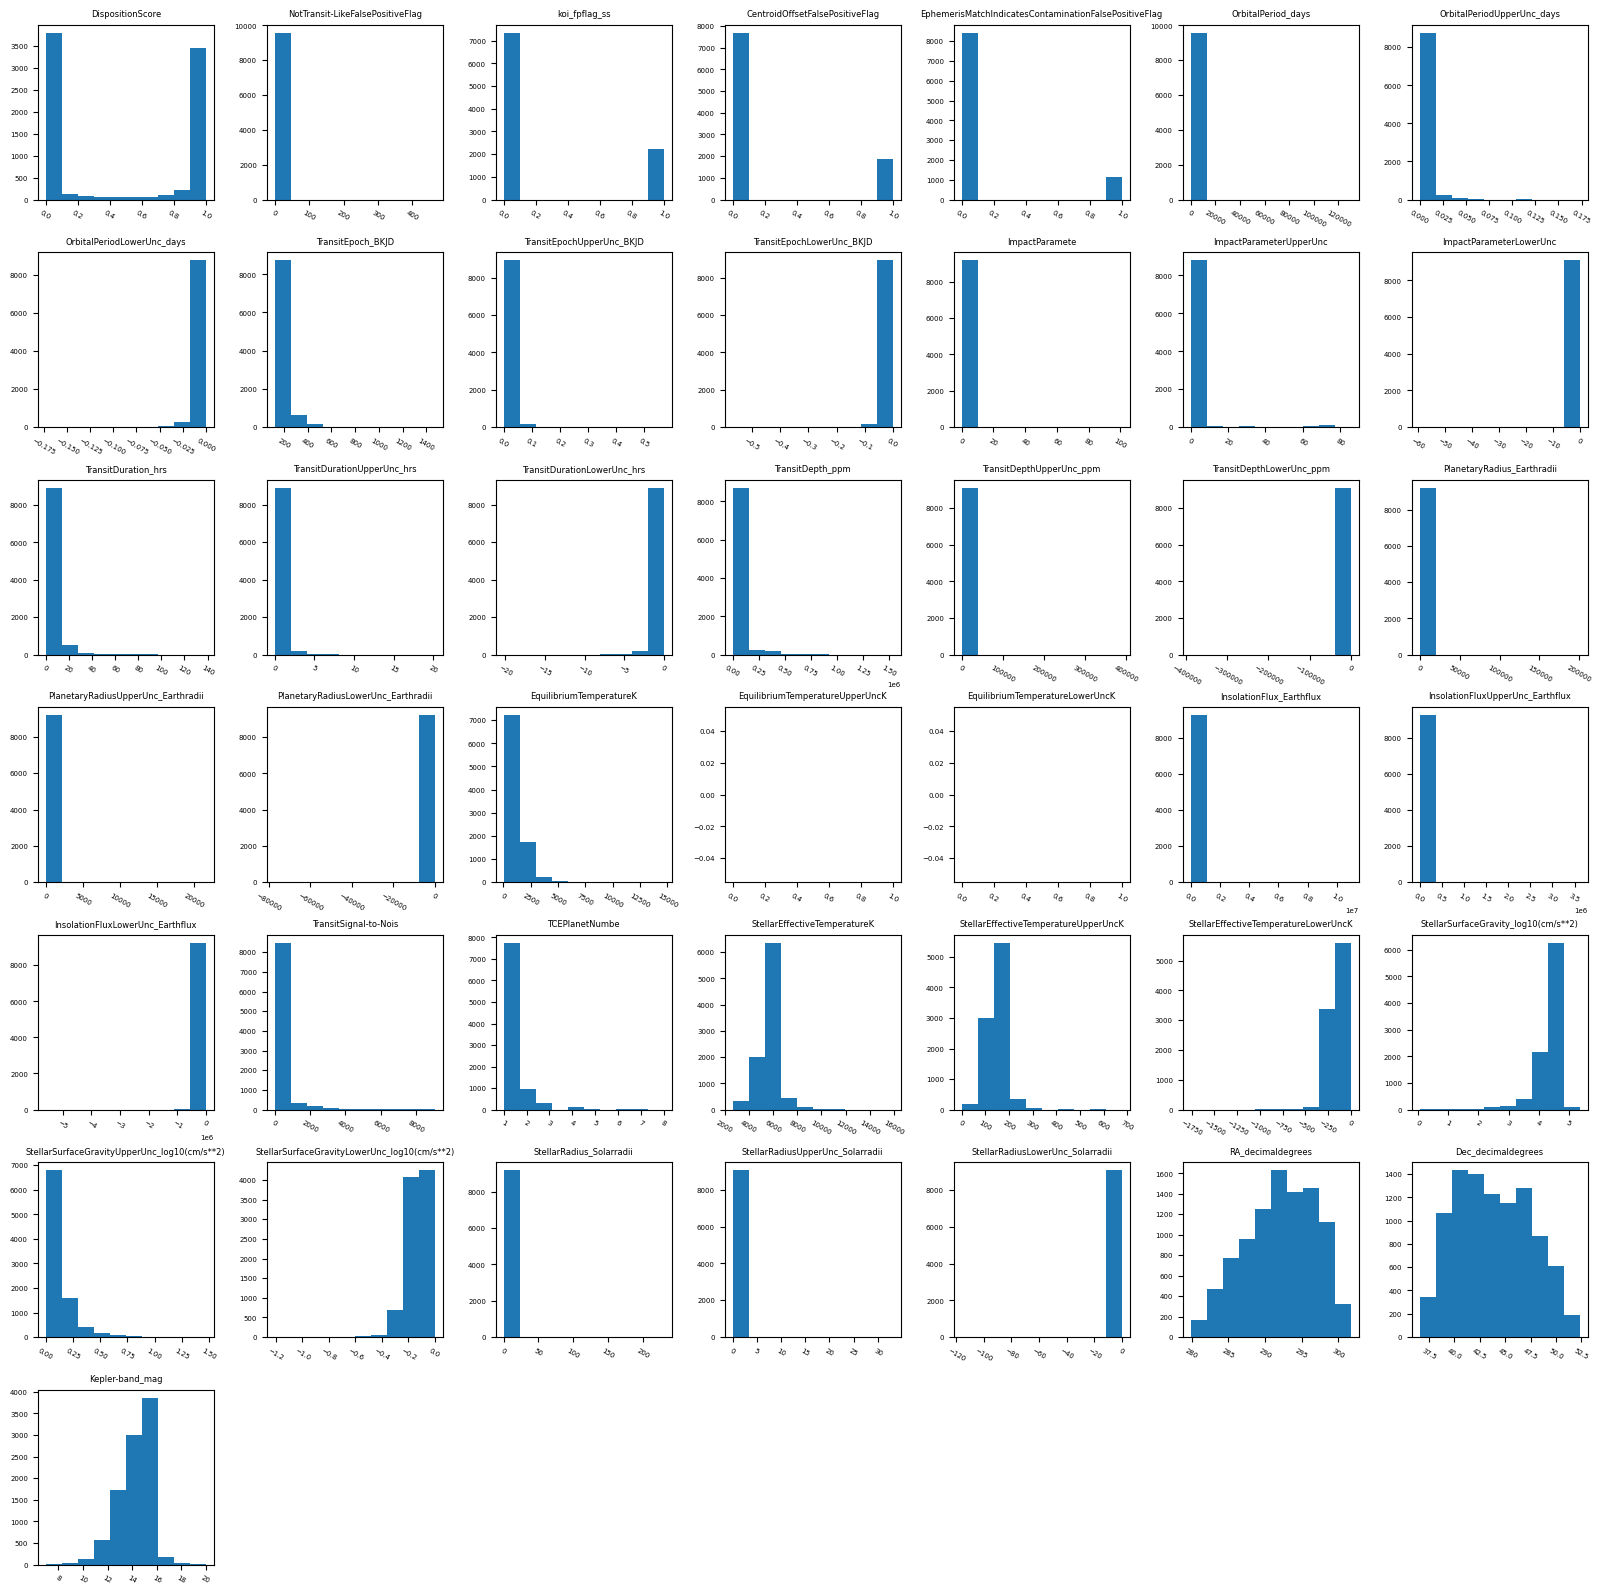

In [84]:
%matplotlib inline
# Plot histogram grid to check how data is distributed
df.hist(figsize=(20,20), xrot=-30, grid=False), 
plt.show()

In [85]:
#Decribe the the columns to get a better understanding of the data
df.describe()

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,TransitEpochUpperUnc_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,8054.000,9564.000,9564.000,9564.000,9564.000,9564.000,9110.000,9110.000,9564.000,9110.000,...,9081.000,9201.000,9096.000,9096.000,9201.000,9096.000,9096.000,9564.000,9564.000,9563.000
mean,0.481,0.209,0.233,0.198,0.120,75.671,0.002,-0.002,166.183,0.010,...,-162.265,4.310,0.121,-0.143,1.729,0.362,-0.395,292.060,43.810,14.265
std,0.477,4.767,0.423,0.398,0.325,1334.744,0.008,0.008,67.919,0.023,...,72.746,0.433,0.133,0.085,6.127,0.931,2.168,4.767,3.601,1.385
min,0.000,0.000,0.000,0.000,0.000,0.242,0.000,-0.173,120.516,0.000,...,-1762.000,0.047,0.000,-1.207,0.109,0.000,-116.137,279.853,36.577,6.966
25%,0.000,0.000,0.000,0.000,0.000,2.734,0.000,-0.000,132.762,0.001,...,-198.000,4.218,0.042,-0.196,0.829,0.129,-0.250,288.661,40.777,13.440
50%,0.334,0.000,0.000,0.000,0.000,9.753,0.000,-0.000,137.225,0.004,...,-160.000,4.438,0.070,-0.128,1.000,0.251,-0.111,292.261,43.678,14.520
75%,0.998,0.000,0.000,0.000,0.000,40.715,0.000,-0.000,170.695,0.011,...,-114.000,4.543,0.149,-0.088,1.345,0.364,-0.069,295.859,46.715,15.322
max,1.000,465.000,1.000,1.000,1.000,129995.778,0.173,0.000,1472.522,0.569,...,0.000,5.364,1.472,0.000,229.908,33.091,0.000,301.721,52.336,20.003


In [86]:
# Print the unique classes and their counts/frequencies
df['ExoplanetArchiveDisposition'].value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

In [87]:
# Print the unique classes and their counts/frequencies
df['DispositionUsingKeplerData'].value_counts()

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

### Check Missing Values

In [88]:
#Check for missing values
df.isnull().sum()

KOIName                                                     0
KeplerName                                               7205
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactParamete                                            363
ImpactPa

### Outliers

<Axes: ylabel='DispositionScore'>

<Axes: ylabel='NotTransit-LikeFalsePositiveFlag'>

<Axes: ylabel='koi_fpflag_ss'>

<Axes: ylabel='CentroidOffsetFalsePositiveFlag'>

<Axes: ylabel='EphemerisMatchIndicatesContaminationFalsePositiveFlag'>

<Axes: ylabel='OrbitalPeriod_days'>

<Axes: ylabel='OrbitalPeriodUpperUnc_days'>

<Axes: ylabel='OrbitalPeriodLowerUnc_days'>

<Axes: ylabel='TransitEpoch_BKJD'>

<Axes: ylabel='TransitEpochUpperUnc_BKJD'>

<Axes: ylabel='TransitEpochLowerUnc_BKJD'>

<Axes: ylabel='ImpactParamete'>

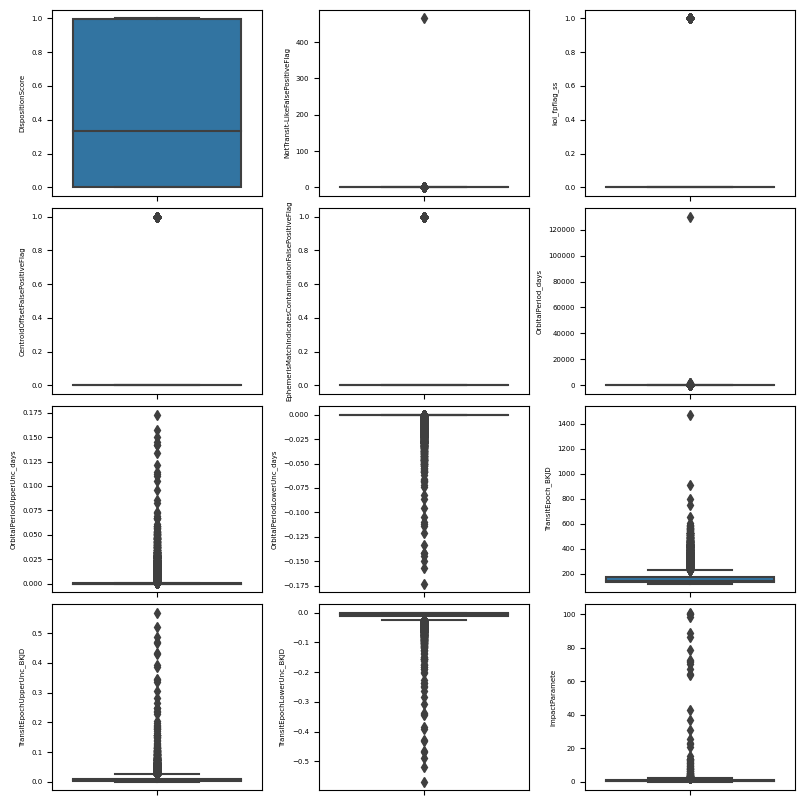

In [96]:
#Plot the boxplot for all columns to check outliers
#Choosing only float or int columns
cols = df.select_dtypes(include=['float', 'int64']).columns
fig, axes = plt.subplots(4, 3, figsize=(8, 8))
plt.rcParams.update({'font.size': 5})
#Make a boxplot for each numerical column
for i, ax in enumerate(axes.flatten()):
    sn.boxplot(y=cols[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

In [98]:
#another option to plot boxplot postion 2 x 2 in a grid 
#cols = df.select_dtypes(include=['float', 'int64']).columns
#for col in cols:
   # plt.figure() 
   # df.boxplot([col], grid=False, fontsize=5, figsize=(2,2))
    


Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

In [130]:
#calculate the upper and lower bound

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [131]:
#print the upper and lower bound
for col in cols:
    lr,ur=outlier_treatment(df[col])
    print(col,lr,ur)

DispositionScore nan nan
NotTransit-LikeFalsePositiveFlag 0.0 0.0
koi_fpflag_ss 0.0 0.0
CentroidOffsetFalsePositiveFlag 0.0 0.0
EphemerisMatchIndicatesContaminationFalsePositiveFlag 0.0 0.0
OrbitalPeriod_days -54.238555908125015 97.68741770487502
OrbitalPeriodUpperUnc_days nan nan
OrbitalPeriodLowerUnc_days nan nan
TransitEpoch_BKJD 75.86238850000001 227.5939325
TransitEpochUpperUnc_BKJD nan nan
TransitEpochLowerUnc_BKJD nan nan
ImpactParamete nan nan
ImpactParameterUpperUnc nan nan
ImpactParameterLowerUnc nan nan
TransitDuration_hrs -3.3203749999999985 12.034624999999998
TransitDurationUpperUnc_hrs nan nan
TransitDurationLowerUnc_hrs nan nan
TransitDepth_ppm nan nan
TransitDepthUpperUnc_ppm nan nan
TransitDepthLowerUnc_ppm nan nan
PlanetaryRadius_Earthradii nan nan
PlanetaryRadiusUpperUnc_Earthradii nan nan
PlanetaryRadiusLowerUnc_Earthradii nan nan
EquilibriumTemperatureK nan nan
EquilibriumTemperatureUpperUncK nan nan
EquilibriumTemperatureLowerUncK nan nan
InsolationFlux_Earthflux 

Correlation Analysis: We wanted to check relationships between variables in order to decide if they were related to eachere (correclated) using correlation analysis. We calculated the correlation coefficients and visualized them using a heatmap. The correlation coefficient, often denoted as r, ranges from -1 to 1, with values closer to -1 or 1 indicating a stronger relationship and values closer to 0 indicating a weaker relationship.

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

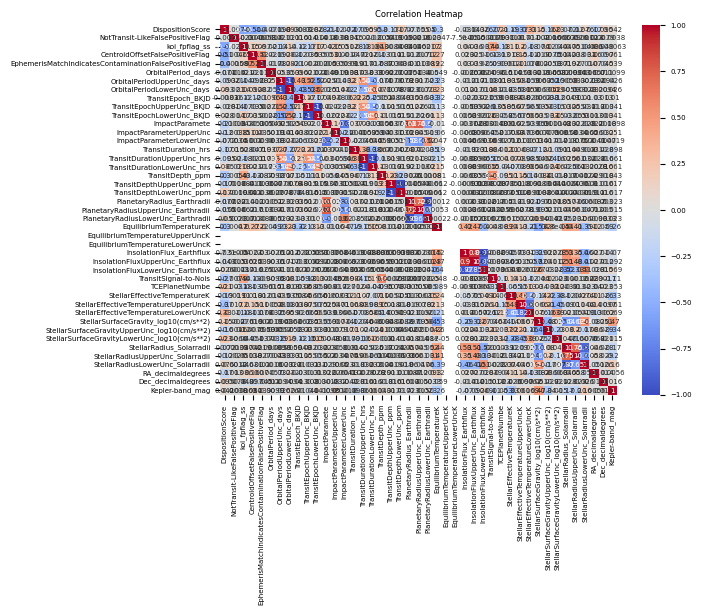

In [134]:
# Compute correlation matrix, include only float and int columns
corr_matrix = df.select_dtypes(include=['float', 'int64']).corr()
# Plot correlation heatmap
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
